# Procesamiento de imágenes con histogramas

Histograma: es el gráfico de la representación de distribuciones de frecuencias, en el que se emplean rectángulos dentro de unas coordenadas.

En nuestro caso, utlizaremos los histogramas para determinar el valor de una intensidad de un pixel en una imagen.

Ejemplo. Considere $A \in {\rm I\!R}^{4x4}$, tal que:

\begin{equation}
A = \left[
    \begin{matrix}
        0 & 5 & 3 & 1 \\
        2 & 5 & 1 & 0 \\
        0 & 2 & 4 & 1 \\
        0 & 0 & 0 & 1 \\
    \end{matrix}
    \right]
\end{equation}

Es claro que los valores que toma $A$ están en el conjunto $\{0, 1, 2, 3, 4, 5\}$, con la siguiente distribución de frecuencias

0: 6 veces; 1: 4 veces; 2: 2 veces; 3: 1 vez; 4: 1 vez, 5: 2 veces

### Histograma

![title](media/ejemplo_histograma.png)

En imágenes a escala de grises, tenemos una matriz $A \in {\rm I\!R}^{mxn}$, donde cada entrada (pixel) toma los valores en el conjunto  $\{0, 1, \ldots, 5\}$. 
El histograma de una imagen es la representación de la frecuencia de aparición de cada nivel de gris en la imagen. Cada entrada individual del histograma se expresa de la siguiente manera

\begin{equation}
h(k) = n_k = card\{(x, y) / f(x, y) = k\}
\end{equation}

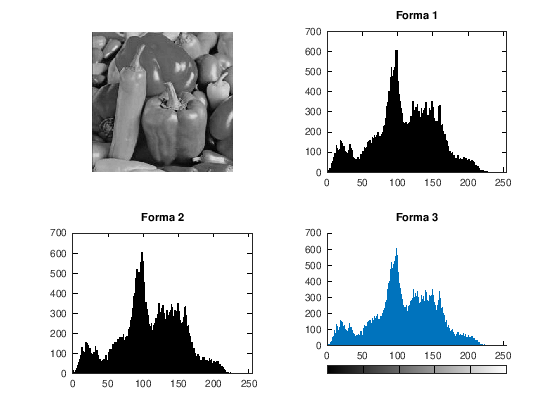

In [1]:
pkg load image;

% Ejemplo 1 sobre Histogramas
A = imread('media/peppers.jpg');
subplot(2, 2, 1);
imshow(A);

% Forma 1 de calcular el histograma
h1 = zeros(256, 1); %h1 = [h(0) h(1) h(2) ... h(255)]
[m, n] = size(A);
tic % Calcular el tiempo de la forma 1
for i = 1:m
  for j = 1:n
    h1(A(i, j) + 1) = h1(A(i, j) + 1) + 1;
  endfor
endfor

subplot(2, 2, 2);
bar(0:255, h1);
title('Forma 1');
xlim([0 255]); % Comando para limitar  los limites del eje x
t1 = toc;

% Forma 2 de calcular el histograma
h2 = zeros(256, 1);

tic % Calcular el tiempo de la forma 2
for i = 0:255
  h2(i+1) = sum(sum(A==i));
endfor

subplot(2, 2, 3);
bar(0:255, h2);
title('Forma 2');
xlim([0 255]); % Comando para limitar  los limites del eje x
t2 = toc;

% Forma 3 de calcular el histograma
subplot(2, 2, 4)
tic % Calcular el tiempo de la forma 3
imhist(A); % Comando de Octave para graficar el histograma
title('Forma 3');
t3 = toc;

In [2]:
disp(["Tiempo forma 1: " num2str(t1) " s"]);
disp(["Tiempo forma 2: " num2str(t2) " s"]);
disp(["Tiempo forma 3: " num2str(t3) " s"]);

Tiempo forma 1: 1.4393 s
Tiempo forma 2: 0.30325 s
Tiempo forma 3: 0.73286 s


## Técnicas para modificar imágenes con el histograma

### Ecualización del Histograma
Es una técnica que cambia la distribución de nivel de gris de una imagen de tal manera que se obtiene un histograma resultante uniforme, en el que el porcentaje de pixeles de cada nivel de gris es el mismo.
Para esto, se necesita una función auxiliar $T(r)$, que satisface dos criterios:

<br>
<center>i) $T(r)$ es una función creciente $[0, 255]$</center>
<center>ii) $0 \leq T(r) \leq 1, \forall r \in [0, 255]$</center>

Un ejemplo de esta transformación es la función de distribución acumulativa (cdf).

\begin{equation}
S_k = T(r_k) = \sum_{j = 0}^{k} \dfrac{n_j}{n}
\end{equation}

donde $n$ es el número total de pixeles.

Ejemplo: sea $h = [1, 2, 3, 4]$

El vector acumulativo es $a = \left[\dfrac{1}{4} + \dfrac{1 + 3}{4} + \dfrac{1 + 2 + 3}{4} + \dfrac{1 + 2 + 3 + 4}{4}\right]$

**Método.** Sea $A \in {\rm I\!R}^{mxn}$, con valores en sus entradas iguales a $0, 1, \ldots, 255$. Se cambiará el valor de la posición $A_{i,j}$ por el valor $S_k \cdot 255$, es decir, la transformada consistente en la siguiente fórmula

\begin{equation}
\lfloor S_k \cdot 255 \rfloor
\end{equation}

donde $A_{i,j} = k$.

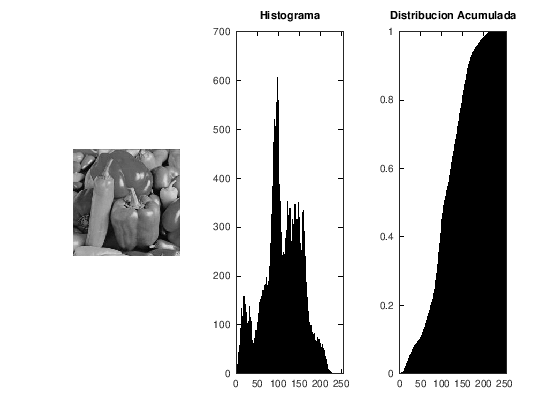

In [3]:
pkg load image;

% Ejemplo 1 sobre Histogramas
A = imread('media/peppers.jpg');
subplot(1, 3, 1);
imshow(A);
[m, n] = size(A);


% Forma 2 de calcular el histograma
h2 = zeros(256, 1);
for i = 0:255
  h2(i+1) = sum(sum(A==i));
endfor

subplot(1, 3, 2);
bar(0:255, h2);
title('Histograma');
xlim([0 255]); % Comando para limitar  los limites del eje x

% Distribucion acumulada
ac = zeros(256, 1);
for i = 0:255
  ac(i+1) = sum(h2(1:i+1))/(m*n);
endfor

subplot(1, 3, 3);
bar(0:255, ac);
title('Distribucion Acumulada');
xlim([0 255]); % Comando para limitar  los limites del eje x

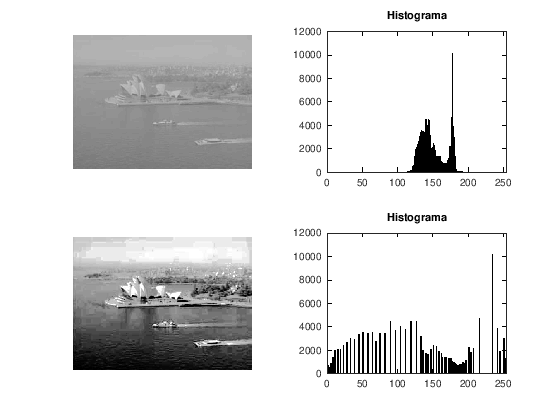

In [4]:
pkg load image;

% Ejemplo 1 sobre Histogramas
A = imread('media/sydney.jpg');
subplot(2, 2, 1);
imshow(A);
[m, n] = size(A);


% Forma 2 de calcular el histograma
h2 = zeros(256, 1);
for i = 0:255
  h2(i+1) = sum(sum(A==i));
endfor

subplot(2, 2, 2);
bar(0:255, h2);
title('Histograma');
xlim([0 255]); % Comando para limitar  los limites del eje x

% Distribucion acumulada
ac = zeros(256, 1);
for i = 0:255
  ac(i+1) = sum(h2(1:i+1))/(m*n);
endfor

% Obtener la nueva imagen aplicando la tecnica de ecualizacion
B = zeros(m, n); B = uint8(B);
for i = 1:m
  for j = 1:n
    B(i, j) = round(ac(A(i, j) + 1)* 255);
  end 
end    
 
subplot(2, 2, 3);
imshow(B);

% Forma 2 de calcular el histograma
h2 = zeros(256, 1);
for i = 0:255
  h2(i+1) = sum(sum(B==i));
endfor

subplot(2, 2, 4);
bar(0:255, h2);
title('Histograma');
xlim([0 255]); % Comando para limitar  los limites del eje x